In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
import statsmodels.stats.tests.test_influence
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
data = pd.read_csv('file:///C:/Users/Aishwarya/Desktop/Datasets/Computer_Data.csv')
d = data.copy()

In [4]:
d.head(7)

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1
5,3695,66,340,16,14,no,no,yes,94,1
6,1720,25,170,4,14,yes,no,yes,94,1


In [5]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
price,6259.0,2219.576610,580.803956,949.0,1794.0,2144.0,2595.0,5399.0
speed,6259.0,52.011024,21.157735,25.0,33.0,50.0,66.0,100.0
hd,6259.0,416.601694,258.548445,80.0,214.0,340.0,528.0,2100.0
ram,6259.0,8.286947,5.631099,2.0,4.0,8.0,8.0,32.0
screen,6259.0,14.608723,0.905115,14.0,14.0,14.0,15.0,17.0
ads,6259.0,221.301007,74.835284,39.0,162.5,246.0,275.0,339.0
trend,6259.0,15.926985,7.873984,1.0,10.0,16.0,21.5,35.0


In [6]:
d.isnull().sum()

price      0
speed      0
hd         0
ram        0
screen     0
cd         0
multi      0
premium    0
ads        0
trend      0
dtype: int64

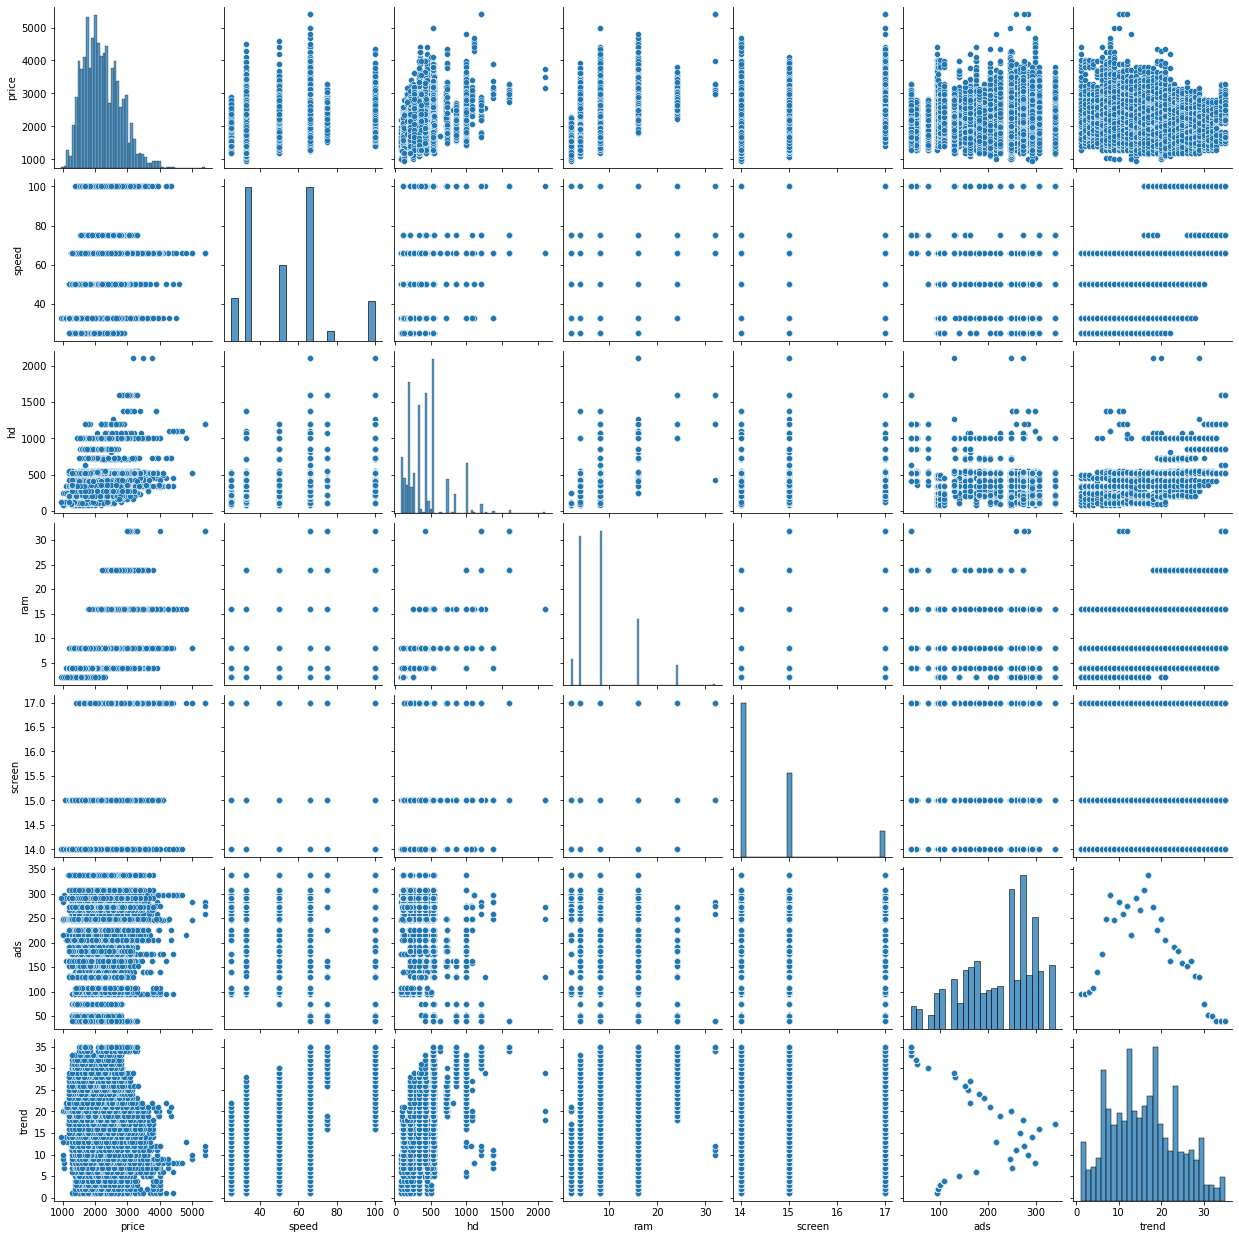

In [7]:
sns.pairplot(d)

<AxesSubplot:>

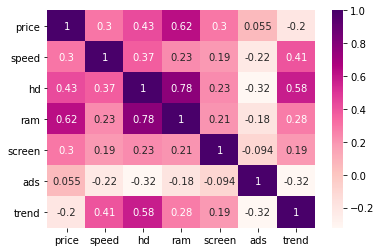

In [8]:
corrm = d.corr()
sns.heatmap(corrm ,cmap='RdPu', annot=True)

# Model Building

In [9]:
d['cd'] = d['cd'].map({'yes':1, 'no':0})

In [10]:
d['multi'] = d['multi'].map({'yes':1, 'no':0})

In [11]:
d['premium'] = d['premium'].map({'yes':1,'no':0})

In [16]:
x = d.iloc[:, 1:10]
y = d.iloc[:, 0]

In [18]:
model = sm.OLS(y, x.astype(float)).fit()

In [19]:
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          4.740e+04
Date:                Sun, 13 Dec 2020   Prob (F-statistic):                        0.00
Time:                        15:29:58   Log-Likelihood:                         -44052.
No. Observations:                6259   AIC:                                  8.812e+04
Df Residuals:                    6250   BIC:                                  8.818e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
speed          9.3310      0.185     50.325      0.000       8.968       9.695
hd             0.7786      0.028     28.146      0.000       0.724       0.833
ram           48.0928      1.068     45.042      0.000      46.000      50.186
screen       142.1451      1.435     99.043      0.000     139.332     144.959
cd            56.3969      9.493      5.941      0.000      37.787      75.007
multi        106.5261     11.427      9.322      0.000      84.125     128.928
premium     -494.9547     12.045    -41.091      0.000    -518.568    -471.342
ads            0.7292      0.049     14.748      0.000       0.632       0.826
trend        -51.6160      0.628    -82.153      0.000     -52.848     -50.384
==============================================================================
Omnibus:                      993.429   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2966.136
Skew:                           0.831   Prob(JB):                         0.00
Kurtosis:                       5.935   Cond. No.                     1.91e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""